In [1]:
import cluster

In [2]:
df, lat_long = cluster.get_data()

In [4]:
df.shape

(73424, 61)

In [5]:
df2 = cluster.make_structure_data(df)

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65266 entries, 0 to 73423
Data columns (total 11 columns):
bathroomcnt                     65266 non-null float64
bedroomcnt                      65266 non-null float64
calculatedfinishedsquarefeet    65266 non-null float64
heatingorsystemtypeid           65266 non-null float64
lotsizesquarefeet               65266 non-null float64
yearbuilt                       65266 non-null float64
structuretaxvaluedollarcnt      65266 non-null float64
taxvaluedollarcnt               65266 non-null float64
latitude                        65266 non-null float64
longitude                       65266 non-null float64
logerror                        65266 non-null float64
dtypes: float64(11)
memory usage: 6.0 MB


In [7]:
standard_train, standard_test, standard_object = cluster.scale_and_prune_data(df2)

In [8]:
standard_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41139 entries, 72193 to 17765
Data columns (total 9 columns):
bathroomcnt                     41139 non-null float64
bedroomcnt                      41139 non-null float64
calculatedfinishedsquarefeet    41139 non-null float64
heatingorsystemtypeid           41139 non-null float64
lotsizesquarefeet               41139 non-null float64
yearbuilt                       41139 non-null float64
structuretaxvaluedollarcnt      41139 non-null float64
taxvaluedollarcnt               41139 non-null float64
logerror                        41139 non-null float64
dtypes: float64(9)
memory usage: 3.1 MB


In [9]:
df_with_clusters = cluster.make_clusters(standard_train)

In [10]:
df_with_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41139 entries, 72193 to 17765
Data columns (total 10 columns):
bathroomcnt                     41139 non-null float64
bedroomcnt                      41139 non-null float64
calculatedfinishedsquarefeet    41139 non-null float64
heatingorsystemtypeid           41139 non-null float64
lotsizesquarefeet               41139 non-null float64
yearbuilt                       41139 non-null float64
structuretaxvaluedollarcnt      41139 non-null float64
taxvaluedollarcnt               41139 non-null float64
logerror                        41139 non-null float64
cluster_labels                  41139 non-null int32
dtypes: float64(9), int32(1)
memory usage: 3.3 MB


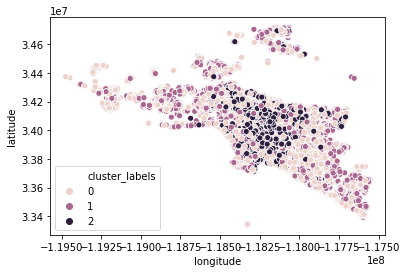

In [11]:
cluster.show_clusters_on_map(df_with_clusters)

In [ ]:
lat_long